epoch   0  train_loss=2741.98, test_loss=2066.29
epoch 100  train_loss=80.85, test_loss=174.45
epoch 200  train_loss=39.65, test_loss=72.47
epoch 300  train_loss=19.83, test_loss=27.85
epoch 400  train_loss=10.28, test_loss=9.48
epoch 500  train_loss=5.69, test_loss=2.78
Predicted score for 9 hours: 93.2


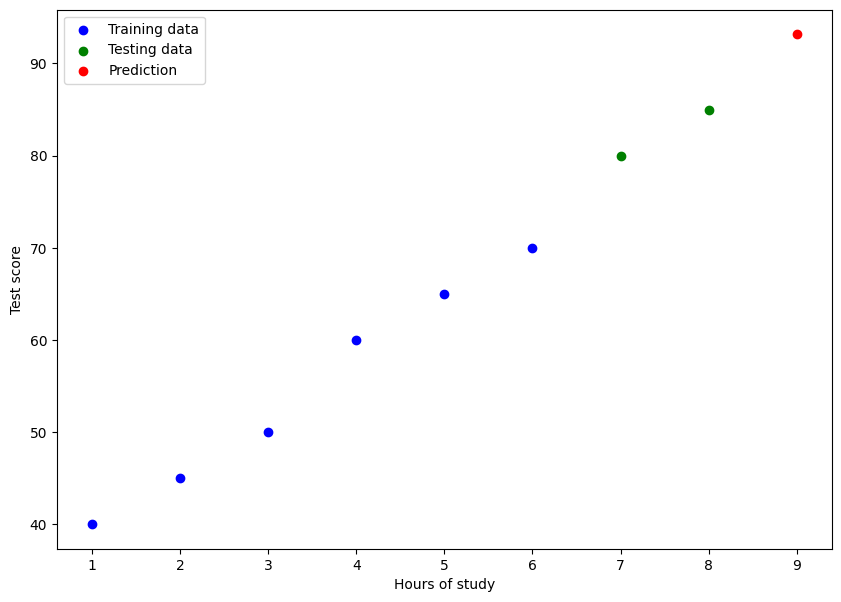

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(42)

# -----------------------
# 1) Data (features & label)
# -----------------------
X = torch.tensor([[1.0],[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[8.0]])
y = torch.tensor([[20.0],[45.0],[50.0],[60.0],[65.0],[70.0],[80.0],[85.0]])

# -----------------------
# 2) Train/Test split
#    We'll train on the first 6 points and test on the last 2.
#    (In real life, you'd usually shuffle first.)
# -----------------------
split = int(len(X)*0.8) # Split 80% training, 20% testing
X_train, y_train = X[:split], y[:split]
X_test,  y_test  = X[split:], y[split:]

# -----------------------
# 3) Model, loss, optimizer
# -----------------------
model = nn.Linear(in_features=____, out_features=____)  # 1 → 1 linear regressor
loss_fn = ____                                          # e.g., nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=____) # e.g., 0.01

# -----------------------
# 4) Training loop
# -----------------------

EPOCHS = 600
for epoch in range(EPOCHS):
    model.train()
    y_pred = model(____)               # training inputs
    loss = loss_fn(____, ____)         # predictions vs targets

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # ============= DO NOT MODIFY: TESTING BLOCK (kept complete) =============
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"epoch {epoch:3d}  train_loss={loss.item():.2f}, test_loss={test_loss.item():.2f}")



# -----------------------
# 4) Make a Prediction
# -----------------------
model.eval()
with torch.no_grad():
    pred_9h = model(torch.tensor([[9.0]])).item()
    print(f"Predicted score for 9 hours: {pred_9h:.1f}")

plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.scatter(9, pred_9h, c="r", label="Prediction")
plt.title("Hours of study vs Score")
plt.xlabel("Hours of study")
plt.ylabel("Score")
plt.legend()
plt.show()
